In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
from plotly.graph_objs import *
from plotly.offline import init_notebook_mode, iplot, iplot_mpl

pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_excel('2021금융데이터 경진대회_데이터셋_한국투자증권(원본).xlsx')

In [3]:
df.columns =  ['id', 'day', 'gender', 'age', 'adress', 'time', 
                'stock_code', 'stock_name', 'kospi_kosdaq', 'sell_buy', 
                'order_code', 'order_price', 'order_volume', 'true_order_volume', 'true_order_price', 
                'before_close', 'start', 'high', 'low', 'close', 'volume', 'volume_price', 'high_yn', 'low_yn']

In [4]:
df

,id,day,gender,age,adress,time,stock_code,stock_name,kospi_kosdaq,sell_buy,order_code,order_price,order_volume,true_order_volume,true_order_price,before_close,start,high,low,close,volume,volume_price,high_yn,low_yn
0,A0001,20200128,1,30,경기,1,00000A091970,나노캠텍,3,2,1,3795,20,20,75900,3215,3710,4125,3660,4095,17266597,67323312855,N,N
1,A0001,20200130,1,30,경기,3,00000A045060,오공,3,2,1,7710,20,20,154200,7690,8150,8380,7360,7920,15686931,125404000000,N,N
2,A0001,20200313,1,30,경기,1,00000A253840,수젠텍,3,2,1,11800,10,10,118000,13600,12200,12250,10150,10750,3731106,40782765600,N,N
3,A00010,20200220,1,20,경남,3,00000A009190,대양금속보통주,2,2,1,3505,14,14,49070,3615,3615,3675,3475,3505,635410,2250893355,N,N
4,A000100,20200211,2,40,서울,1,00000A001740,SK네트웍스보통주,2,1,1,4875,3,3,14625,4780,4800,4885,4800,4850,1263089,6112026870,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845935,A0009999,20200331,1,20,충북,2,00000A043200,파루,3,2,1,2020,150,150,303000,1995,2035,2135,1990,2030,2764564,5682482755,N,N
845936,A0009999,20200325,1,20,충북,2,00000A068760,셀트리온제약,3,1,1,63400,8,8,507200,57300,61700,70600,58700,60300,8892944,560929000000,N,N
845937,A0009999,20200330,1,20,충북,1,00000A038290,마크로젠,3,2,1,38800,25,25,970000,38900,40050,40800,37500,40400,1912985,75631708300,N,N
845938,A0009999,20200323,1,20,충북,1,00000A000660,에스케이하이닉스보통주,2,1,1,69200,8,8,553600,74800,69700,71600,68000,69400,8037426,560505000000,N,N


In [5]:
df['adress'].unique()

array(['경기', '경남', '서울', '광주', '대전', '울산', '대구', '충북', '부산', '인천', '경북',
       '충남', '강원', '전북', '전남', '제주'], dtype=object)

In [6]:
len(df['stock_name'].unique())

1971

In [7]:
df['day'] = pd.to_datetime(df['day'],format='%Y%m%d')

In [8]:
df.sort_values('day', inplace=True)
df.head()

,id,day,gender,age,adress,time,stock_code,stock_name,kospi_kosdaq,sell_buy,order_code,order_price,order_volume,true_order_volume,true_order_price,before_close,start,high,low,close,volume,volume_price,high_yn,low_yn
711180,A000592,2020-01-20,2,20,서울,2,00000A192820,코스맥스보통주,2,2,1,87500,20,20,1750000,87600,87500,91300,85900,86800,269228,23825292800,N,N
83205,A00010330,2020-01-20,2,20,서울,2,00000A042510,라온시큐어,3,2,1,2860,2,2,5710,2910,2895,2910,2835,2850,234253,670307175,N,N
311689,A00016551,2020-01-20,2,50,대구,2,00000A005930,삼성전자보통주,2,2,1,62500,1,1,62500,61300,62000,62800,61700,62400,12440366,775520000000,N,N
293034,A00015886,2020-01-20,2,40,서울,3,00000A005930,삼성전자보통주,2,2,1,62500,3,3,187500,61300,62000,62800,61700,62400,12440366,775520000000,N,N
59805,A0005442,2020-01-20,2,20,서울,2,00000A005930,삼성전자보통주,2,2,1,62700,1,1,62700,61300,62000,62800,61700,62400,12440366,775520000000,N,N


In [9]:
df2 = df.set_index('day')

In [11]:
def plot_candlestick(df):
    data = Candlestick(x=df2.index, open=df2['start'], high=df2['high'], low=df2['low'], close=df2['close'])
    figure = Figure(data=data)
    iplot(figure)

<AxesSubplot:xlabel='day', ylabel='volume_price'>

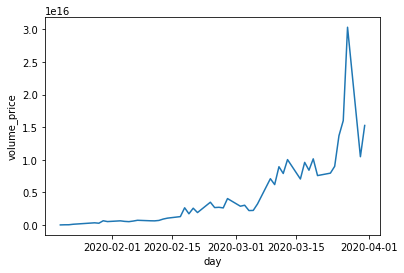

In [29]:
volume_price_df = pd.DataFrame(df.groupby('day')['volume_price'].sum())
sns.lineplot(x=volume_price_df.index, y=volume_price_df['volume_price'])

In [41]:
volume_price_df[['volume_price']].idxmax()

volume_price   2020-03-27
dtype: datetime64[ns]

In [42]:
volume_price_df[['volume_price']]

,volume_price
day,
2020-01-20,23171347715453
2020-01-21,43814148819654
2020-01-22,47979396764501
2020-01-23,125023847190241
2020-01-28,345523183109685
2020-01-29,283925420638400
2020-01-30,659693776352771
2020-01-31,535771128027554
2020-02-03,648021371347992


In [45]:
march_27 = df[df['day']=='2020-03-27']

In [48]:
march_27['stock_name'].value_counts()

씨젠          5999
삼성전자보통주     2472
파미셀보통주      2242
신풍제약보통주     1962
수젠텍         1898
            ... 
계양전기보통주        1
이베스트투자증권       1
신풍제지보통주        1
대성파인텍          1
코리아센터          1
Name: stock_name, Length: 1549, dtype: int64

In [50]:
march_27[march_27['stock_name']=='씨젠']

,id,day,gender,age,adress,time,stock_code,stock_name,kospi_kosdaq,sell_buy,order_code,order_price,order_volume,true_order_volume,true_order_price,before_close,start,high,low,close,volume,volume_price,high_yn,low_yn
295700,A00015953,2020-03-27,1,20,전남,3,00000A096530,씨젠,3,1,1,115800,41,41,4747800,114500,125500,141400,97900,115900,19626058,2456040000000,N,N
258851,A00015020,2020-03-27,1,30,인천,3,00000A096530,씨젠,3,1,1,116400,72,72,8380800,114500,125500,141400,97900,115900,19626058,2456040000000,N,N
498394,A00021794,2020-03-27,2,20,인천,3,00000A096530,씨젠,3,2,1,118000,1,1,118000,114500,125500,141400,97900,115900,19626058,2456040000000,N,N
819777,A0009228,2020-03-27,2,30,경기,1,00000A096530,씨젠,3,1,1,139700,9,9,1257300,114500,125500,141400,97900,115900,19626058,2456040000000,N,N
258846,A00015020,2020-03-27,1,30,인천,3,00000A096530,씨젠,3,2,5,148800,72,72,8316000,114500,125500,141400,97900,115900,19626058,2456040000000,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799145,A0008587,2020-03-27,2,30,서울,3,00000A096530,씨젠,3,1,5,148800,3,3,294000,114500,125500,141400,97900,115900,19626058,2456040000000,N,N
540590,A00023148,2020-03-27,1,40,전북,2,00000A096530,씨젠,3,1,1,136300,51,51,6951300,114500,125500,141400,97900,115900,19626058,2456040000000,N,N
799135,A0008587,2020-03-27,2,30,서울,3,00000A096530,씨젠,3,2,5,148800,1,1,107900,114500,125500,141400,97900,115900,19626058,2456040000000,N,N
556578,A00023519,2020-03-27,2,30,충북,2,00000A096530,씨젠,3,2,1,137000,5,5,685000,114500,125500,141400,97900,115900,19626058,2456040000000,N,N
